In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from datetime import datetime
import numpy as np
import pandas as pd
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [100]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [101]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [102]:
target_users= ["CNN" ,"BBCWorld","NYTimes","CBSNews","FoxNews"]
dictionary= {"Target User": [], "Compound List": [], "Positive List": [], "Negative List": [], "Neutral List": [], "Date and Time":[], "Tweets Ago":[]}

for user in target_users:
             
    for x in range(1,6):
        public_tweets = api.user_timeline(user,page=x)
        counter=0
        
        for tweet in public_tweets:
            dictionary["Target User"].append(user)
            results = analyzer.polarity_scores(tweet["text"])
            compound= results["compound"]
            positive= results["pos"]
            negative= results["neg"]
            neutral= results["neu"]
    
            dictionary["Compound List"].append(compound)
            dictionary["Positive List"].append(positive)
            dictionary["Negative List"].append(negative)
            dictionary["Neutral List"].append(neutral)
            
            raw_time= tweet["created_at"]
            converted_time= datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
            dictionary["Date and Time"].append(converted_time)
            counter+=1
            dictionary["Tweets Ago"].append(counter)
            

sentiment= pd.DataFrame(dictionary)
sentiment.head(10)

,Target User,Compound List,Positive List,Negative List,Neutral List,Date and Time,Tweets Ago
0,CNN,-0.4215,0.000,0.157,0.843,2018-10-02 18:10:09+00:00,1
1,CNN,0.0000,0.000,0.000,1.000,2018-10-02 18:00:22+00:00,2
2,CNN,0.0000,0.000,0.000,1.000,2018-10-02 17:52:53+00:00,3
3,CNN,-0.1280,0.000,0.081,0.919,2018-10-02 17:46:55+00:00,4
4,CNN,-0.7425,0.000,0.239,0.761,2018-10-02 17:39:03+00:00,5
5,CNN,0.0000,0.000,0.000,1.000,2018-10-02 17:31:14+00:00,6
6,CNN,0.0000,0.000,0.000,1.000,2018-10-02 17:21:18+00:00,7
7,CNN,0.0000,0.000,0.000,1.000,2018-10-02 17:18:34+00:00,8
8,CNN,-0.5859,0.000,0.242,0.758,2018-10-02 16:59:59+00:00,9
9,CNN,0.7102,0.283,0.000,0.717,2018-10-02 16:33:14+00:00,10


In [103]:
cnn_values=sentiment.loc[sentiment['Target User']=="CNN"]
bbc_values=sentiment.loc[sentiment['Target User']=="BBCWorld"]
nyt_values=sentiment.loc[sentiment['Target User']=="NYTimes"]
cbs_values=sentiment.loc[sentiment['Target User']=="CBSNews"]
fox_values=sentiment.loc[sentiment['Target User']=="FoxNews"]

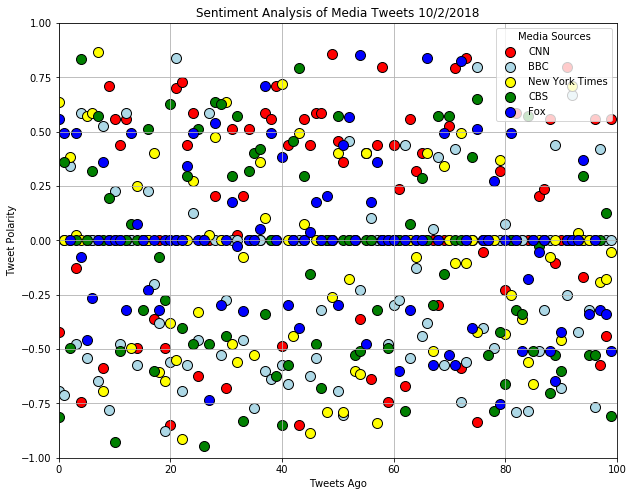

In [104]:
plt.figure(figsize=(10,8))
cnn=plt.scatter(range(len(cnn_values)), cnn_values["Compound List"],s=100,facecolors="red",edgecolors="black")
bbc=plt.scatter(range(len(bbc_values)), bbc_values["Compound List"],s=100,facecolors="lightblue",edgecolors="black")
nyt=plt.scatter(range(len(nyt_values)), nyt_values["Compound List"],s=100,facecolors="yellow",edgecolors="black")
cbs=plt.scatter(range(len(cbs_values)), cbs_values["Compound List"],s=100,facecolors="green",edgecolors="black")
fox=plt.scatter(range(len(fox_values)), fox_values["Compound List"],s=100,facecolors="blue",edgecolors="black")

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets 10/2/2018")
labels_list=["CNN", "BBC", "New York Times", "CBS", "Fox"]
plt.legend(title="Media Sources",labels=labels_list,loc="upper right")

plt.xlim(0,100)
plt.ylim(-1,1)
plt.grid()

#savefig


In [115]:
cnn_total=cnn_values["Compound List"].sum()
bbc_total=bbc_values["Compound List"].sum()
nyt_total=nyt_values["Compound List"].sum()
cbs_total=cbs_values["Compound List"].sum()
fox_total=fox_values["Compound List"].sum()

In [118]:
media=["CNN", "BBC", "NYT", "CBS", "FOX"]
polarity = [cnn_total,bbc_total,nyt_total,cbs_total,fox_total]
x_axis = np.arange(len(media))

Text(0,0.5,'Tweet Polarity')

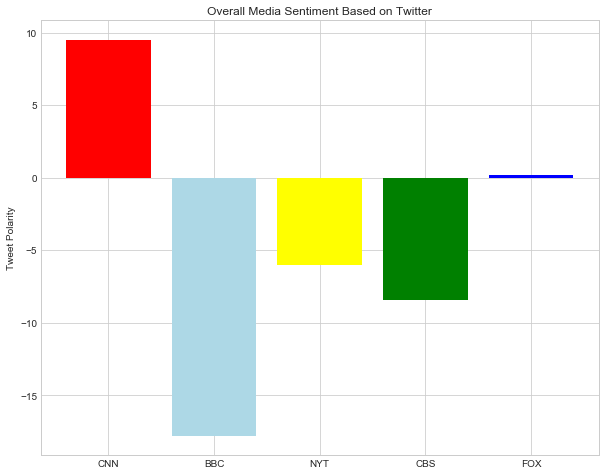

In [122]:
plt.figure(figsize=(10,8))
plt.bar(x_axis,polarity,color=["red","lightblue","yellow","green","blue"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, media)
plt.title("Overall Media Sentiment Based on Twitter")
plt.ylabel("Tweet Polarity")

